In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import geopandas as gpd
import plotly.express as px

In [2]:
#reading datasets
health_df = gpd.read_file('../Datasets/health-care.geojson')
adminstrative_df = gpd.read_file('../Datasets/lga.geojson')
pop_df = gpd.read_file('../Datasets/NGA_population.json')

# Cleaning datasets

In [3]:
health_df.columns

Index(['id', 'latitude', 'longitude', 'contact_phone', 'contact_name',
       'ri_service_status', 'timestamp', 'cce_quantity', 'cce_available',
       'cce_lastupdated', 'category', 'global_id', 'name', 'alternate_name',
       'functional_status', 'type', 'ownership', 'ward_code', 'accessibility',
       'source', 'ward_name', 'lga_code', 'lga_name', 'state_code',
       'state_name', 'geometry'],
      dtype='object')

In [4]:
health_df = health_df[['latitude', 'longitude','functional_status','type', 'lga_name','state_name', 'geometry']]

In [5]:
adminstrative_df.columns

Index(['id', 'geometry_type', 'amap_code', 'source', 'lga_code', 'lga_name',
       'state_code', 'global_id', 'state_name', 'geometry'],
      dtype='object')

In [6]:
adminstrative_df = adminstrative_df[['lga_name','state_name', 'geometry']]

In [7]:
pop_df.columns

Index(['lgacode', 'lganame', 'statecode', 'source', 'timestamp', 'globalid',
       'amapcode', 'id', 'statename', 'region', 'mean', 'q025', 'q05', 'q25',
       'q50', 'q75', 'q95', 'q975', 'geometry'],
      dtype='object')

In [8]:
pop_df = pop_df[['lganame','mean', 'statename', 'geometry']]

In [9]:
pop_df = pop_df[pop_df['statename']=='Lagos']

In [10]:
pop_df.head()

,lganame,mean,statename,geometry
2,Amuwo Odofin,3.775413e+05,Lagos,"POLYGON ((3.28873 6.49425, 3.28872 6.49434, 3...."
3,Ajeromi Ifelodun,3.142226e+05,Lagos,"POLYGON ((3.33864 6.47314, 3.33542 6.47046, 3...."
4,Surulere,1.182823e+05,Lagos,"POLYGON ((3.32334 6.50114, 3.32331 6.50103, 3...."
28,Agege,2.894498e+05,Lagos,"POLYGON ((3.30945 6.65138, 3.30659 6.64999, 3...."
29,Alimosho,2.079944e+06,Lagos,"POLYGON ((3.24001 6.64587, 3.23929 6.64224, 3...."


In [11]:
pop_df['lganame'].unique()

array(['Amuwo Odofin', 'Ajeromi Ifelodun', 'Surulere', 'Agege',
       'Alimosho', 'Apapa', 'Lagos Mainland', 'Mushin', 'Oshodi Isolo',
       'Shomolu', 'Kosofe', 'Ojo', 'Ibeju Lekki', 'Badagry',
       'Lagos Island', 'Eti Osa', 'Epe', 'Ikorodu', 'Ikeja',
       'Ifako Ijaye'], dtype=object)

In [12]:
health_df['lga_name'].unique()

array(['Agege', 'Ajeromi/Ifelodun', 'Alimosho', 'Amuwo Odofin', 'Apapa',
       'Badagry', 'Epe', 'Eti Osa', 'Ibeju Lekki', 'Ifako/Ijaye', 'Ikeja',
       'Ikorodu', 'Kosofe', 'Mushin', 'Ojo', 'Oshodi/Isolo', 'Shomolu',
       'Surulere', 'Lagos Mainland', 'Lagos Island'], dtype=object)

In [13]:
pop_df = pop_df.replace(to_replace=['Ajeromi Ifelodun', 'Ifako Ijaye','Oshodi Isolo' ],
                       value=['Ajeromi/Ifelodun','Ifako/Ijaye', 'Oshodi/Isolo']).reset_index()
pop_df = pop_df.rename(columns={'lganame':'lga_name'})
pop_df.drop('index', axis=1, inplace=True)

In [14]:
pop_df.head()

,lga_name,mean,statename,geometry
0,Amuwo Odofin,3.775413e+05,Lagos,"POLYGON ((3.28873 6.49425, 3.28872 6.49434, 3...."
1,Ajeromi/Ifelodun,3.142226e+05,Lagos,"POLYGON ((3.33864 6.47314, 3.33542 6.47046, 3...."
2,Surulere,1.182823e+05,Lagos,"POLYGON ((3.32334 6.50114, 3.32331 6.50103, 3...."
3,Agege,2.894498e+05,Lagos,"POLYGON ((3.30945 6.65138, 3.30659 6.64999, 3...."
4,Alimosho,2.079944e+06,Lagos,"POLYGON ((3.24001 6.64587, 3.23929 6.64224, 3...."


In [15]:
health_pop = health_df.merge(pop_df, how='left', on='lga_name')

In [16]:
health_pop.drop(columns=['statename','geometry_x'],axis=1, inplace=True)

In [17]:
health_pop.rename(columns={'geometry_y':'geometry'}, inplace=True)

In [18]:
health_pop.head()

,latitude,longitude,functional_status,type,lga_name,state_name,mean,geometry
0,6.624977,3.319815,Functional,Primary,Agege,Lagos,289449.7823,"POLYGON ((3.30945 6.65138, 3.30659 6.64999, 3...."
1,6.619202,3.320412,Functional,Primary,Agege,Lagos,289449.7823,"POLYGON ((3.30945 6.65138, 3.30659 6.64999, 3...."
2,6.612740,3.313860,Unknown,Primary,Agege,Lagos,289449.7823,"POLYGON ((3.30945 6.65138, 3.30659 6.64999, 3...."
3,6.617422,3.316163,Functional,Primary,Agege,Lagos,289449.7823,"POLYGON ((3.30945 6.65138, 3.30659 6.64999, 3...."
4,6.622920,3.318610,Functional,Primary,Agege,Lagos,289449.7823,"POLYGON ((3.30945 6.65138, 3.30659 6.64999, 3...."


In [19]:
total_hospital_count = health_pop.groupby('lga_name')['geometry'].count().reset_index()
total_hospital_count

,lga_name,geometry
0,Agege,53
1,Ajeromi/Ifelodun,55
2,Alimosho,168
3,Amuwo Odofin,63
4,Apapa,38
5,Badagry,73
6,Epe,41
7,Eti Osa,57
8,Ibeju Lekki,39
9,Ifako/Ijaye,86


In [20]:
type(total_hospital_count)

pandas.core.frame.DataFrame

In [21]:
hosp_per_x = total_hospital_count.merge(pop_df, how='left', on='lga_name')

In [22]:
hosp_per_x.rename(columns={'geometry_x':'count', 'mean':'mean_pop', 'geometry_y':'geometry'}, inplace=True)

In [23]:
hosp_per_x.head()

,lga_name,count,mean_pop,statename,geometry
0,Agege,53,2.894498e+05,Lagos,"POLYGON ((3.30945 6.65138, 3.30659 6.64999, 3...."
1,Ajeromi/Ifelodun,55,3.142226e+05,Lagos,"POLYGON ((3.33864 6.47314, 3.33542 6.47046, 3...."
2,Alimosho,168,2.079944e+06,Lagos,"POLYGON ((3.24001 6.64587, 3.23929 6.64224, 3...."
3,Amuwo Odofin,63,3.775413e+05,Lagos,"POLYGON ((3.28873 6.49425, 3.28872 6.49434, 3...."
4,Apapa,38,2.713695e+05,Lagos,"POLYGON ((3.33864 6.47314, 3.33873 6.47307, 3...."


In [24]:
hosp_per_x['Health_facilities_per_100000'] = (hosp_per_x['count']/hosp_per_x['mean_pop'])*100000

In [25]:
hosp_per_x

,lga_name,count,mean_pop,statename,geometry,Health_facilities_per_100000
0,Agege,53,2.894498e+05,Lagos,"POLYGON ((3.30945 6.65138, 3.30659 6.64999, 3....",18.310603
1,Ajeromi/Ifelodun,55,3.142226e+05,Lagos,"POLYGON ((3.33864 6.47314, 3.33542 6.47046, 3....",17.503516
2,Alimosho,168,2.079944e+06,Lagos,"POLYGON ((3.24001 6.64587, 3.23929 6.64224, 3....",8.077140
3,Amuwo Odofin,63,3.775413e+05,Lagos,"POLYGON ((3.28873 6.49425, 3.28872 6.49434, 3....",16.686917
4,Apapa,38,2.713695e+05,Lagos,"POLYGON ((3.33864 6.47314, 3.33873 6.47307, 3....",14.003050
5,Badagry,73,6.637296e+05,Lagos,"POLYGON ((2.85255 6.44997, 2.84675 6.44662, 2....",10.998454
6,Epe,41,2.029021e+05,Lagos,"POLYGON ((3.96943 6.67980, 3.94084 6.68029, 3....",20.206794
7,Eti Osa,57,4.933282e+05,Lagos,"POLYGON ((3.40962 6.47838, 3.40844 6.47212, 3....",11.554175
8,Ibeju Lekki,39,3.027041e+05,Lagos,"POLYGON ((3.71908 6.56005, 3.71906 6.56001, 3....",12.883868
9,Ifako/Ijaye,86,2.971824e+05,Lagos,"POLYGON ((3.30945 6.65138, 3.31142 6.64355, 3....",28.938456


In [26]:
hosp_per_x.columns

Index(['lga_name', 'count', 'mean_pop', 'statename', 'geometry',
       'Health_facilities_per_100000'],
      dtype='object')

In [27]:
hosp_per_x.drop(columns=['count','mean_pop', 'statename'], axis=1, inplace=True)

In [28]:
hosp_per_x.head()

,lga_name,geometry,Health_facilities_per_100000
0,Agege,"POLYGON ((3.30945 6.65138, 3.30659 6.64999, 3....",18.310603
1,Ajeromi/Ifelodun,"POLYGON ((3.33864 6.47314, 3.33542 6.47046, 3....",17.503516
2,Alimosho,"POLYGON ((3.24001 6.64587, 3.23929 6.64224, 3....",8.077140
3,Amuwo Odofin,"POLYGON ((3.28873 6.49425, 3.28872 6.49434, 3....",16.686917
4,Apapa,"POLYGON ((3.33864 6.47314, 3.33873 6.47307, 3....",14.003050


In [29]:
geo = hosp_per_x

In [30]:
import json 
  
# Opening JSON file 
f = open('lga.geojson',) 
  
# returns JSON object as  
# a dictionary 
file = json.load(f) 

In [31]:
f =open("access-token", 'r')
lines = f.readlines()
access_token = lines[0]
style_url = lines[1]

In [32]:
geo = hosp_per_x['geometry']

In [33]:
geo.head()

0    POLYGON ((3.30945 6.65138, 3.30659 6.64999, 3....
1    POLYGON ((3.33864 6.47314, 3.33542 6.47046, 3....
2    POLYGON ((3.24001 6.64587, 3.23929 6.64224, 3....
3    POLYGON ((3.28873 6.49425, 3.28872 6.49434, 3....
4    POLYGON ((3.33864 6.47314, 3.33873 6.47307, 3....
Name: geometry, dtype: geometry

In [34]:
geo.shape

(20,)

In [ ]:
hosp_per_x.columns

In [36]:
x = hosp_per_x[['lga_name','Health_facilities_per_100000']]

In [37]:
import geopandas as gp

In [38]:
gdf = gp.read_file("lga.geojson")

In [39]:
dfff = pd.merge(x,gdf,'left', on='lga_name')

In [49]:
x = dfff[["lga_code",'Health_facilities_per_100000']]
x.head()

,lga_code,Health_facilities_per_100000
0,25001,18.310603
1,25002,17.503516
2,25003,8.077140
3,25004,16.686917
4,25005,14.003050


In [41]:
temp = gp.GeoDataFrame(dfff)

In [42]:
temp.to_file("output.json", driver="GeoJSON")

In [43]:
import json 
  
# Opening JSOfile 
f = open('output.json') 
  
# returns JSON object as  
# a dictionary 
jay = json.load(f) 

In [57]:
jay['features'][0]["properties"]

{'lga_name': 'Agege',
 'Health_facilities_per_100000': 18.310602819893706,
 'id': 'sv_boundary_lgas.fid--3786de59_172f10f09af_1245',
 'geometry_type': 'MULTIPOLYGON',
 'amap_code': 'NIE LAS GGE',
 'source': 'eHA_Polio                                                                                                                                                                                                                                                      ',
 'lga_code': '25001',
 'state_code': 'LA',
 'global_id': '6b0e16f1-f41b-4f7d-a7ab-226d0acbe831',
 'state_name': 'Lagos'}

In [60]:
x['lga_code'] = x['lga_code'].astype("str")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
x.dtypes

lga_code                         object
Health_facilities_per_100000    float64
dtype: object

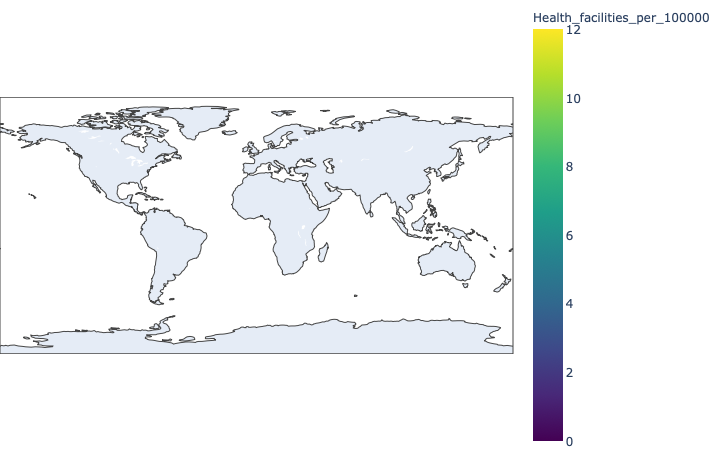

In [62]:
fig = px.choropleth(x, geojson=jay, locations='lga_code', color='Health_facilities_per_100000',
                           color_continuous_scale="Viridis",
                            featureidkey="properties.lga_code",
                           range_color=(0, 12),
                           labels={'Health_facilities_per_100000':'Health_facilities_per_100000'}
                          )
# fig.update_layout(mapbox_style=style_url, mapbox_accesstoken=access_token)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()